# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Sep 20 (Thursday) 11:00 pm </b> </font>

<font color="blue"> Benjamin Poole </font>

# Introduction

The objective of this assignment is to use the least squares and least mean squares methods to predict the appliances total energy usage based on different features of a home. These features will be further described in the Data section followed by the Method, Experiment and Conclusion sections.

# Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Regression: Appliances Energy Prediction Data Set 

The goal of this data set is to predict appliances energy usage in a home. This dataset contains 19735 samples with 25 base features (27 including random variable features) relating to the temperature/humidity of different rooms, outside weather factors and the energy use of light fixtures in the house (see features). Every row corresponds to 10 mins of data gathered over 4.5 months for a single house in Belgium.

 #### Features
- Appliances, energy use in Wh **TARGET**
- lights, energy use of light fixtures in the house in Wh <br>
- T1, Temperature in kitchen area, in Celsius <br>
- RH_1, Humidity in kitchen area, in % <br>
- T2, Temperature in living room area, in Celsius <br>
- RH_2, Humidity in living room area, in % <br>
- T3, Temperature in laundry room area <br>
- RH_3, Humidity in laundry room area, in %<br> 
- T4, Temperature in office room, in Celsius <br>
- RH_4, Humidity in office room, in % <br>
- T5, Temperature in bathroom, in Celsius <br>
- RH_5, Humidity in bathroom, in % <br>
- T6, Temperature outside the building (north side), in Celsius<br> 
- RH_6, Humidity outside the building (north side), in % <br>
- T7, Temperature in ironing room , in Celsius <br>
- RH_7, Humidity in ironing room, in % <br>
- T8, Temperature in teenager room 2, in Celsius <br>
- RH_8, Humidity in teenager room 2, in % <br>
- T9, Temperature in parents room, in Celsius <br>
- RH_9, Humidity in parents room, in % <br>
- To, Temperature outside (from Chievres weather station), in Celsius <br>
- Pressure (from Chievres weather station), in mm Hg <br>
- RH_out, Humidity outside (from Chievres weather station), in % <br>
- Wind speed (from Chievres weather station), in m/s <br>
- Visibility (from Chievres weather station), in km <br>
- Tdewpoint (from Chievres weather station), Â°C <br>

[Data Link](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction)

### Preprocessing 

For preprocessing I have removed the 2 random variables that were added by the creators of the data along with the data/time of when the data was collected. Now, there should only be features relating to appliance energy usuage, or so we shall see.

In [1]:
# Preprocessing
df_reg = pd.read_csv("regress_data.csv")
df_reg_rd = df_reg.drop(['date'],1) # With random values for regression (provided by dataset authors)
df_reg = df_reg.drop(['date', 'rv1', 'rv2'],1) # Without random values for regression (provided by dataset authors)
print("With random values shape:", df_reg_rd.shape)
df_reg

NameError: name 'pd' is not defined

### Visualization

**Appliances Energy Usuage**: Here we can see the energy usuage of the Appliances in Wh. This graph makes it hard to really see what is happening.

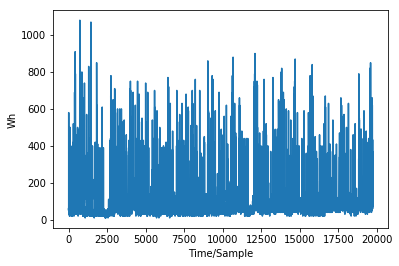

In [3]:
plt.plot(df_reg.iloc[:,0])
plt.xlabel("Time/Sample")
plt.ylabel("Wh");

Below we can see how many times each Wh value occurred over the 4.5 months. As we can see 50 and 60 Wh occured the most and can assume our mean appliance usuage should be around 50-60 Wh.

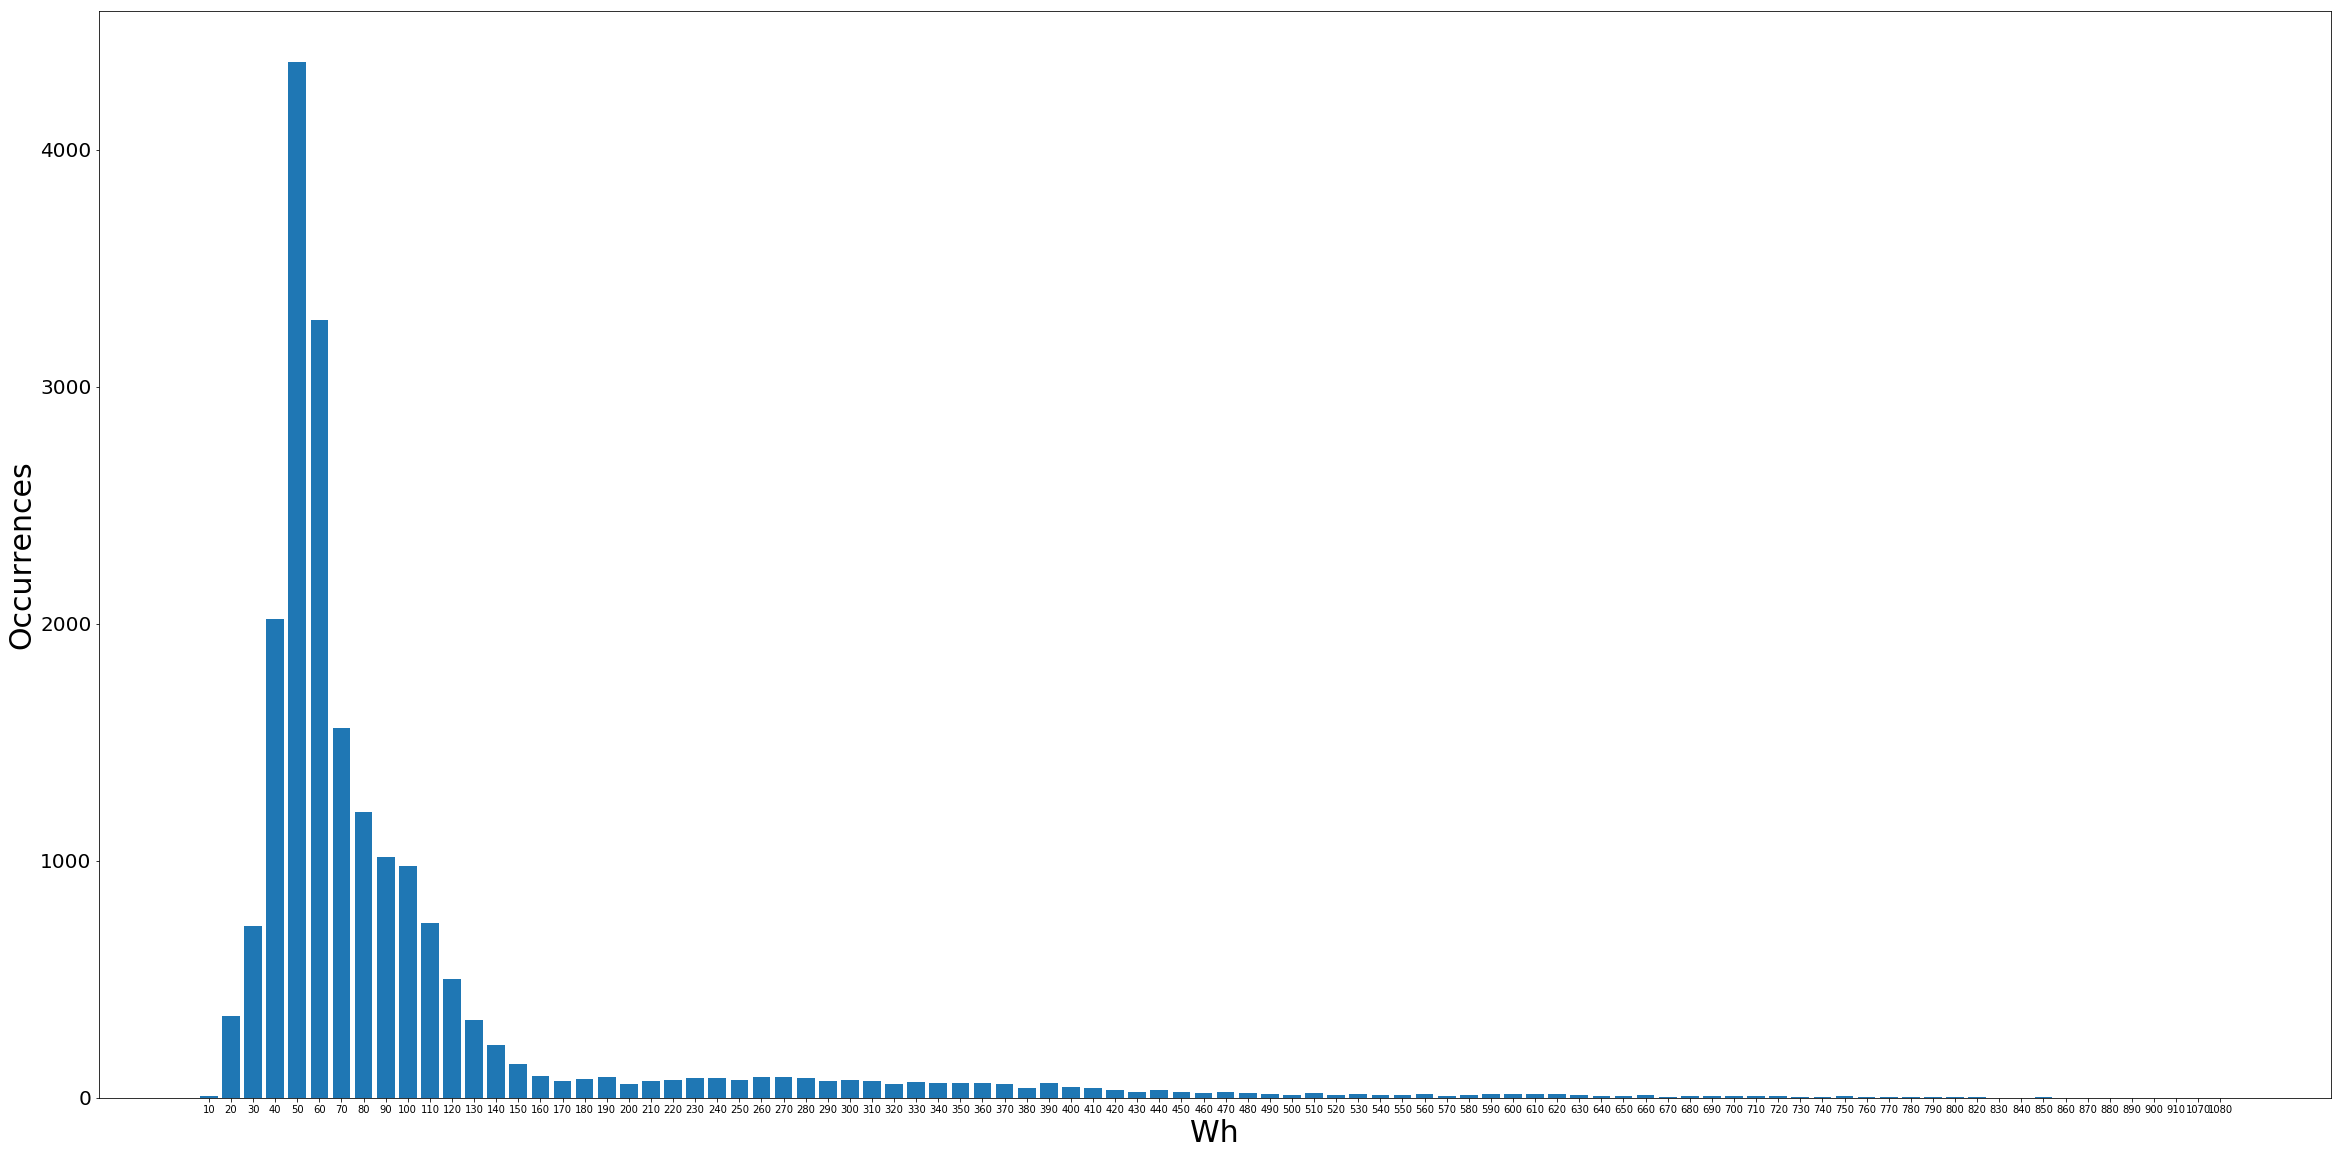

In [4]:
app = df_reg.iloc[:,0].values
count = np.unique(app, return_counts=True)
fig, ax = plt.subplots(1,1, figsize=(40,20))
ax.bar(range(0, 92),count[1], tick_label =count[0])
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel("Wh",  fontsize=30)
ax.set_ylabel("Occurrences", fontsize=30);

**Room Temperatures** Here we can see a linear trend in the increase in temperature over time in all rooms of the house. This is most likely due to increase in temperature outside over the 4.5 months. Meaning, that the tests began in April and lasted around five months, therefore ending around August/September, in other words the end of summer (summer tends to end around the end of September in Belgium).

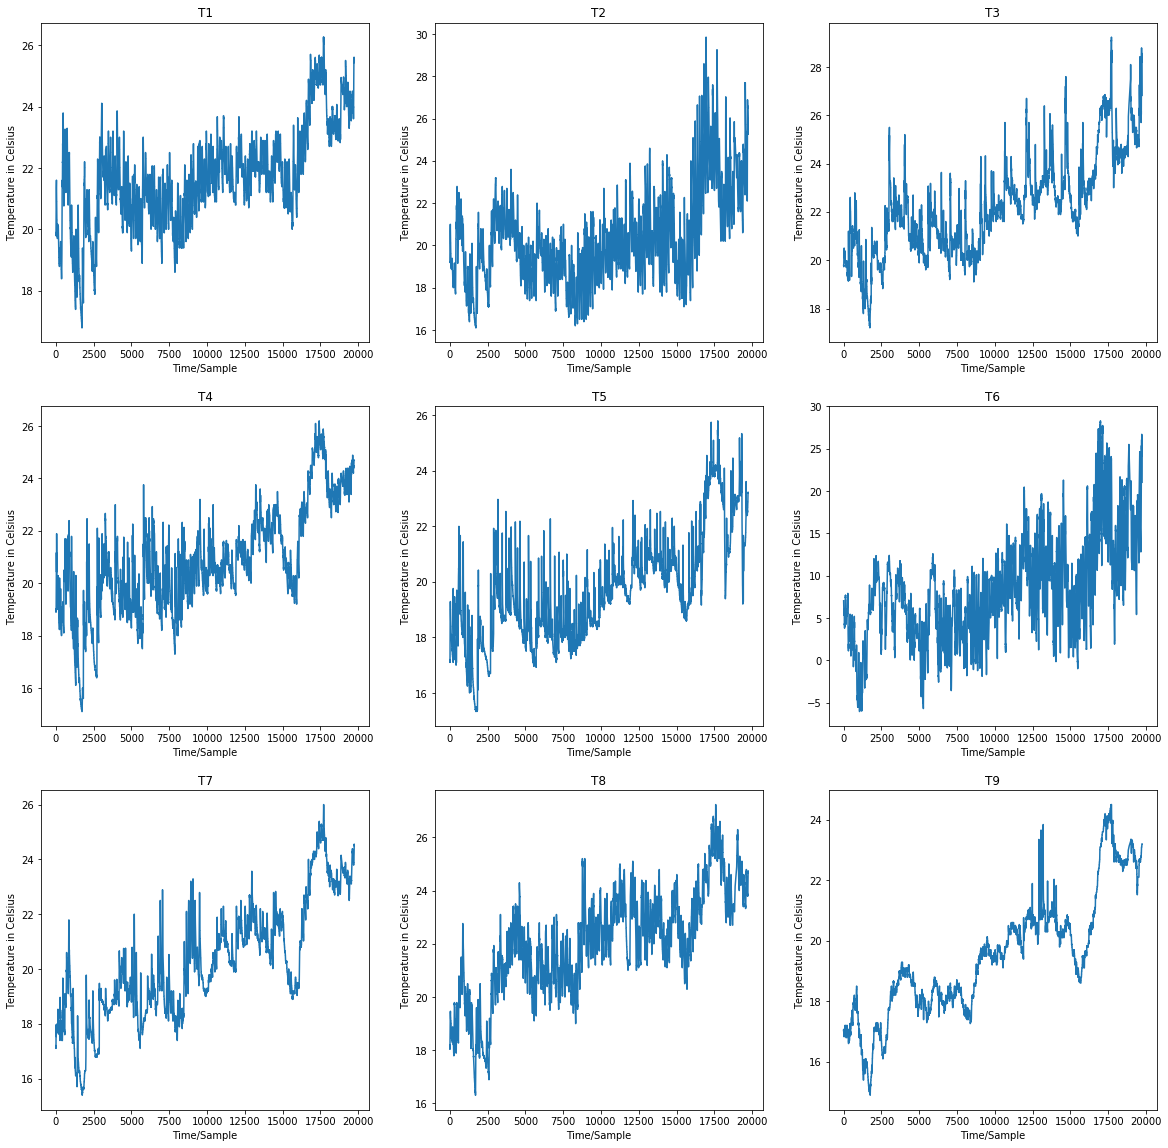

In [5]:
ax = []
fig, ax = plt.subplots(3,3, figsize=(20,20))
ax = ax.flatten()
for i in range(len(ax)):
    loc = "T" + str(i+1)
    ax[i].plot(df_reg.loc[:,loc])
    ax[i].set_title('T' + str(i+1))
    ax[i].set_xlabel("Time/Sample")
    ax[i].set_ylabel("Temperature in Celsius")

**Room Humidity** Here it is much harder to tell if there is a trend. If we take a carful look we can see a negative to neutral trend in humidity over time in almost all the rooms. As summer comes to an end the humidity in the rooms decreases depending on the rooms location. The room with the most neutral trend is the bathroom or RH_5. While the location with the most apparent negative trend is outside or RH_6.

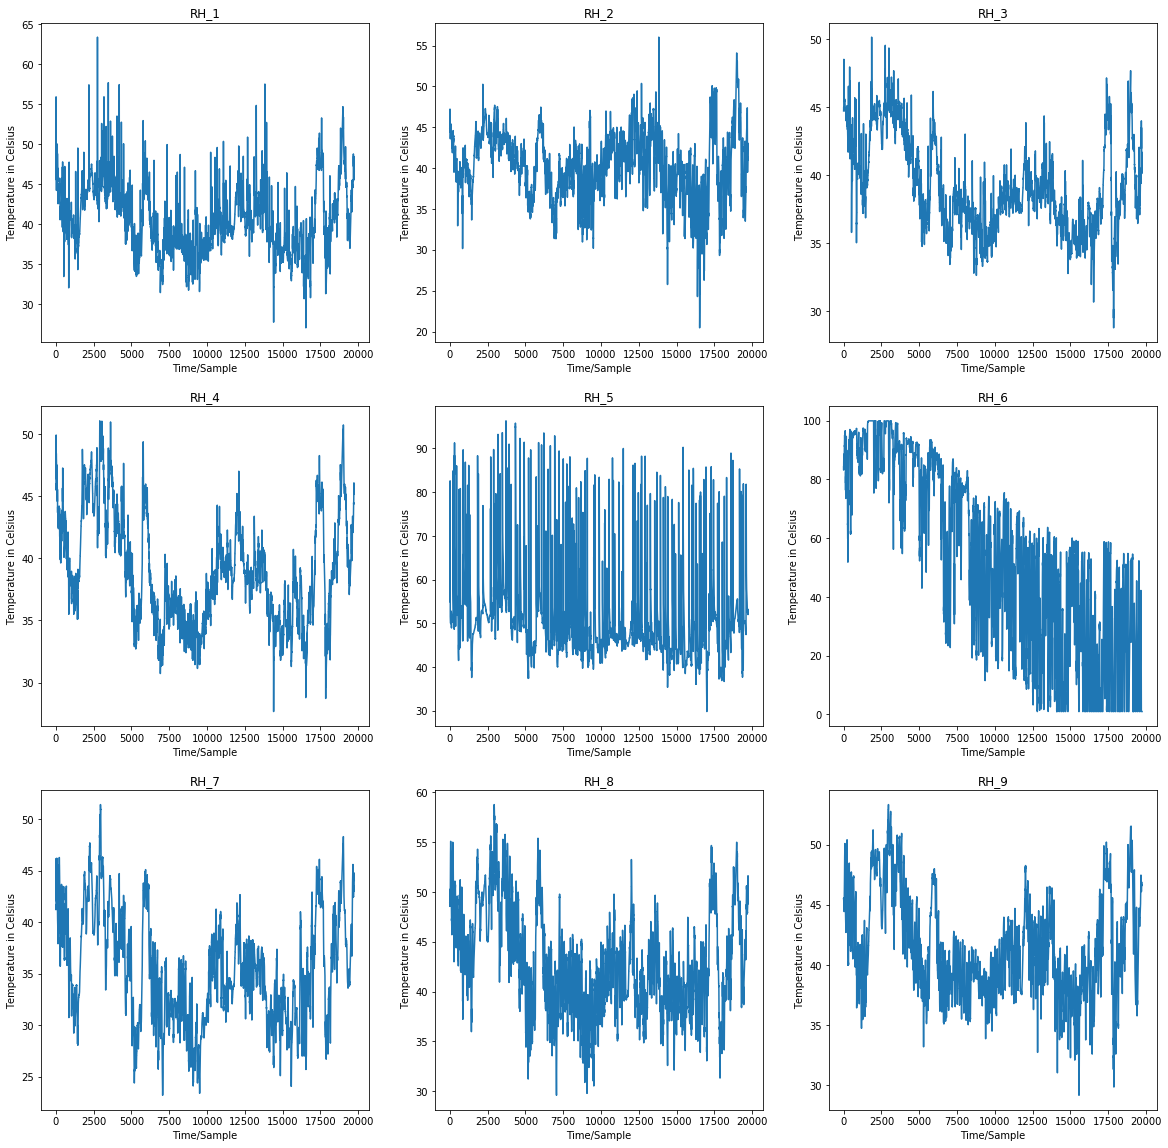

In [6]:
ax = []
fig, ax = plt.subplots(3,3, figsize=(20,20))
ax = ax.flatten()
for i in range(len(ax)):
    loc = "RH_" + str(i+1)
    ax[i].plot(df_reg.loc[:,loc])
    ax[i].set_title('RH_' + str(i+1))
    ax[i].set_xlabel("Time/Sample")
    ax[i].set_ylabel("Temperature in Celsius")

### Preliminary Observations Summary

As you can see from the above observations, my data seems to be following linear trends. Depending on the feature the linear trends may be strong or weak and positive or negatively related. Lastly, we can see that the average value of the energy usage should be around 50-60 Wh.

# Method


### Super Classs Definition

Here we have our super and abstract classes. The super class (BaseModel) contains our empty train and use methods. Our abstract class (LinearModel) then inherits the super class, implementing a few new functions but leaving the train and use methods empty. The abstract class adds two new methods check_matrix and add_ones. The check_matrix method simply checks to make sure the matrix being passed is 2D and returns true or false. The add_ones method simply adds the column of ones, severing as bias, to the passed matrix and then returns it.

In [7]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

Here we have the simplest of our regression methods, least squares. Least squares works by attempting to minimize the following function where we want to find the sum of differences between our predictions and their corresponding targets squared.

$$
w^* = \arg\min_w \sum_{i=1}{N} \Big( f(w_i; w) - t_i \Big)^2
$$

$$
E(w) = w^\top X^\top X w - 2 T^\top X w + T^\top T 
$$

We minimize this function by taking its derivative and thus ending up with a function to update our weights with. Below is the function that we use to update our weights. We do this by feeding all our data at once into the function, also called offline learning. The issue with this method is that very large datasets can not be stored in memory and it is very expense to compute inverses. On the plus side, the theoretical work behind this function guarantees convergence.

$$
w = \big(X^\top X\big)^{-1} X^\top T
$$

In [8]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        self.init_run = True
        
    # train lease-squares model
    def train(self, X, T):
        X1 = self.add_ones(X) # add ones for bias
        self.w = np.zeros(X1.shape[0]) # initial weights to random numbers
        self.w = np.linalg.lstsq(X1.T @ X1, X1.T @ T)[0] # update weights
        error = np.sqrt(np.sum(((X1 @ self.w)-T)**2)) # determine train error
        return error, self.w
    
    # apply the learned model to data X
    def use(self, X):
        X1 = self.add_ones(X) # add ones for bias
        Y = X1 @ self.w # make a prediction
        return Y
        

### Least Mean Squares
Here we have our other regression method, least mean squares. Least mean squares works by still attempting to minimize  our error but now we do it in a online fashion. This means that we update our weights after observing each individual data sample, not the whole dataset at once. The following function is the function we want to minimize, this time though we do not want to expand the error function (we want to immediately take the derivative).

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla E_k 
$$

$$
E_k = \frac{\partial E}{\partial w^{(k)}} = \frac{\partial }{\partial w^{(k)}}\Big( f(x_k; w^{(k)}) - t_k \Big)^2 
$$

$$
E_K = 2\Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$
*Since w.T @ x gives us our prediction, we subsitute it for f(x,w).* <br>
When we take the derivative with respect to *w* we get the following function. The functions reads as the following: our current weight *w* minus the learning rate (size of our steps we take towards the minimum) multiplied by the difference between our prediction and target and then lastly multiplied by the data currently being observed. LMS is great but comes at a cost of potentially never converging.


$$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$

In [49]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
        self.init_run = True
    
    # batch training by using train_step function
    def train(self, X, T):
        error = []
        for i in range(len(X)):
            x = X[i]
            #print(x.shape, T[i].shape)
            error.append(self.train_step(x, T[i])) # append each data's error
        return error, self.w
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x = np.append([1], x).reshape(-1,1) # add one for bias
        print(x.reshape(1,-1))
        if self.init_run: # on the first run initialize weights
            self.w = np.zeros(x.shape[0]).reshape(-1,1) # set weights to 0
            self.init_run = False # indicate it is no longer the first run
        #print(x.T.shape, self.w.shape)
        y =  x.T @ self.w # make a prediction
        #print(y.shape, t.shape, x.shape)
        self.w -= self.alpha * (y - t) * x # update weights
        error = np.sqrt(np.sum((y-t)**2)) # determine train error
        return error
    
    # apply the current model to data X
    def use(self, X):
        X1 = self.add_ones(X) # add ones for bias
        Y = X1 @ self.w # make a prediction
        return Y

### Usage Examples

Below, are examples utilizing the use and train functions to make sure the code is working properly.

In [50]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Loyal\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


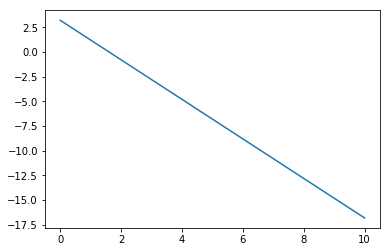

In [51]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2
ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

[[1. 0.]]
[[1. 1.]]
[[1. 2.]]
[[1. 3.]]
[[1. 4.]]
[[1. 5.]]
[[1. 6.]]
[[1. 7.]]
[[1. 8.]]
[[1. 9.]]
[[ 1. 10.]]


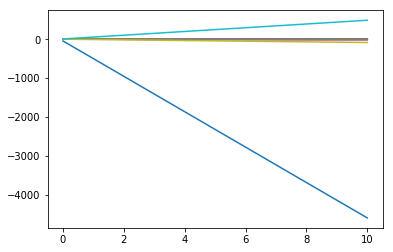

In [52]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

(1, 1) (1,) (2, 1)
(1, 1) (1,) (2, 1)
(1, 1) (1,) (2, 1)
(1, 1) (1,) (2, 1)
(1, 1) (1,) (2, 1)
(1, 1) (1,) (2, 1)
(1, 1) (1,) (2, 1)
(1, 1) (1,) (2, 1)
(1, 1) (1,) (2, 1)
(1, 1) (1,) (2, 1)
(1, 1) (1,) (2, 1)


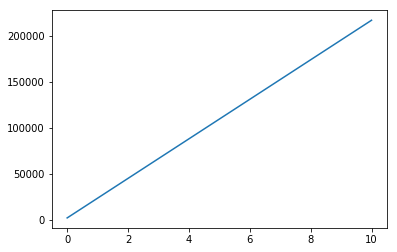

In [28]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiment

### Least Squares

#### Train without random values

The dataset creators provided random values that are supposedly used for creating better regression fits. For LS I am testing to see if these random values truly make a difference. Below is my code for computing train and test errors for the first 25 features. My code is broken up into the subsections: capturing and normalizing of the data, partitioning of the data, and training/testing. I normalize my data by subtracting the mean of a said feature column from the feature value and then divide by the STD of said feature column. I also partition my data in the normal 80/20 split. This format will be followed by the rest of my code!

In [318]:
import math
# Capture/Norm raw data
T_raw = df_reg.iloc[:, 0].values
X_raw = df_reg.iloc[:, 1:].values
for i in range(X_raw.shape[1]): # norm data column wise
       X_raw[:, i] = (X_raw[:, i] - np.mean(X_raw[:, i])) / np.std(X_raw[:, i])
T_raw = (T_raw - np.mean(T_raw)) / np.std(T_raw) # norm data

# Set partition size (80%)
partition = math.floor(len(X_raw) * .8)

# Train data split
X_train = X_raw[:partition, :]
T_train = T_raw[:partition].reshape(-1,1)
print("Train Shape Check:", X_train.shape, T_train.shape)

# Test data split
X_test = X_raw[partition:, :]
T_test = T_raw[partition:].reshape(-1,1)
print("Test Shape Check:", X_test.shape, T_test.shape)

# Init class
ls = LinearRegress()
# Train data
train_err,w_ls = ls.train(X_train, T_train) # capture residual and train error
# Test data
Y = ls.use(X_test)
test_err = np.sqrt(np.sum((Y-T_test)**2)) # calc train error

Train Shape Check: (15788, 25) (15788, 1)
Test Shape Check: (3947, 25) (3947, 1)


C:\Users\Loyal\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [319]:
# Train error
train_err

117.25181203061022

In [320]:
# Test error
test_err

53.14951586527032

Here we can see my models’ predictions. While the predictions do not exactly match the data, it seems to capture the relative pattern. The yellow data is my target while the red data is my predictions. As you can see as the target data decreases so do my predictions. As the target increases so do my prediction. The issue seems to be the predictions values aren't that close to the actual values.

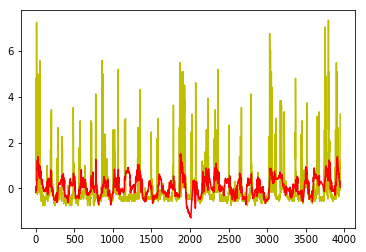

In [321]:
# Actual (yellow) vs Test (red)
plt.plot(T_test, '-y')
plt.plot(Y, '-r')

#### Train with random values

Here is the data with the random values included (now 27 features). Sadly, as you will see, the random vairables did not seem to make a difference and my train and test errors along with my predictions stayed relatively the same.

In [322]:
# Capture/Norm raw data with random
T_raw = df_reg_rd.iloc[:, 0].values
X_raw = df_reg_rd.iloc[:, 1:].values
for i in range(X_raw.shape[1]): # norm data column wise
       X_raw[:, i] = (X_raw[:, i] - np.mean(X_raw[:, i])) / np.std(X_raw[:, i])
T_raw = (T_raw - np.mean(T_raw)) / np.std(T_raw) # norm data

# Set partition size (80%)
partition = math.floor(len(X_raw) * .8)

# Train data split
X_train = X_raw[:partition, :]
T_train = T_raw[:partition].reshape(-1,1)
print("Train Shape Check:", X_train.shape, T_train.shape)

# Test data split
X_test = X_raw[partition:, :]
T_test = T_raw[partition:].reshape(-1,1)
print("Test Shape Check:", X_test.shape, T_test.shape)

# Init class
ls = LinearRegress()
# Train data
train_err, _= ls.train(X_train, T_train)
# Test data
Y = ls.use(X_test)
test_err = np.sqrt(np.sum((Y-T_test)**2))
res_ls = Y-T_test

Train Shape Check: (15788, 27) (15788, 1)
Test Shape Check: (3947, 27) (3947, 1)


C:\Users\Loyal\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [323]:
train_err

117.25125951074955

In [324]:
test_err

53.14741312843037

The pattern matches my LS with no random variable description.

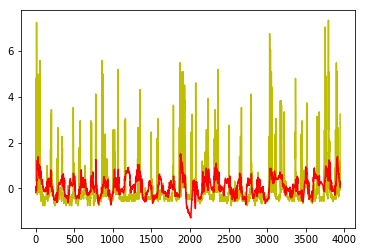

In [325]:
# Actual (yellow) vs Test (red)
plt.plot(T_test, '-y')
plt.plot(Y, '-r')

### Least Mean Squares

#### Train without random values

The dataset creators provided random values that are supposedly used for creating better regression fits, as you heard before. For LMS I am testing to see if these random values truly make a difference. Below is my code for computing train and test errors for the first 25 features.

In [326]:
# Capture raw data
T_raw = df_reg.iloc[:, 0].values
X_raw = df_reg.iloc[:, 1:].values
for i in range(X_raw.shape[1]): # norm data column wise
       X_raw[:, i] = (X_raw[:, i] - np.mean(X_raw[:, i])) / np.std(X_raw[:, i])
T_raw = (T_raw - np.mean(T_raw)) / np.std(T_raw) # norm data

# Set partition size (80%)
partition = math.floor(len(X_raw) * .8)

# Train data split
X_train = X_raw[:partition, :]
T_train = T_raw[:partition].reshape(-1,1)
print("Train Shape Check:", X_train.shape, T_train.shape)

# Test data split
X_test = X_raw[partition:, :]
T_test = T_raw[partition:].reshape(-1,1)
print("Test Shape Check:", X_test.shape, T_test.shape)

# Init class
lms = LMS(.001)
# Train data
train_err, w_lms = lms.train(X_train, T_train) # capture residual and train error
# Test data
Y = lms.use(X_test)
test_err = np.sqrt(np.sum((Y-T_test)**2))
res_lms = Y-T_test

Train Shape Check: (15788, 25) (15788, 1)
Test Shape Check: (3947, 25) (3947, 1)


In [327]:
# Average error per iteration
np.sum(train_err) / len(train_err)

0.5170766775605307

In [328]:
# Test error
test_err

58.12871840292352

Here we can see my models’ predictions. While the predictions do not exactly match the data, it seems to capture the relative pattern just like LS. The yellow data is my target while the red data is my predictions. As you can see as the target data decreases so do my predictions. As the target increases so do my prediction. The issue seems to be the predictions values aren't that close to the actual values, with LMS also predicting less values around 0.

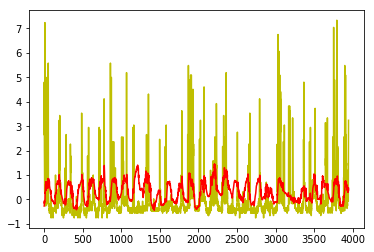

In [329]:
# Actual (yellow) vs Test (red)
plt.plot(T_test, '-y')
plt.plot(Y, '-r')

#### Train with random values

Here is the data with the random values included (now 27 features). Sadly, as you will once see again, the random vairables did not seem to make a difference and my train and test errors along with my predictions stayed relatively the same.

In [330]:
# Capture raw data with random
T_raw = df_reg_rd.iloc[:, 0].values
X_raw = df_reg_rd.iloc[:, 1:].values
for i in range(X_raw.shape[1]): # norm data column wise
       X_raw[:, i] = (X_raw[:, i] - np.mean(X_raw[:, i])) / np.std(X_raw[:, i])
T_raw = (T_raw - np.mean(T_raw)) / np.std(T_raw) # norm data

# Set partition size (80%)
partition = math.floor(len(X_raw) * .8)

# Train data split
X_train = X_raw[:partition, :]
T_train = T_raw[:partition].reshape(-1,1)
print("Train Shape Check:", X_train.shape, T_train.shape)

# Test data split
X_test = X_raw[partition:, :]
T_test = T_raw[partition:].reshape(-1,1)
print("Test Shape Check:", X_test.shape, T_test.shape)

# Init class
lms = LMS(.001)
# Train data
train_err, _ = lms.train(X_train, T_train)
# Test data
Y = lms.use(X_test)
test_err = np.sqrt(np.sum((Y-T_test)**2))
res_lms = Y-T_test

Train Shape Check: (15788, 27) (15788, 1)
Test Shape Check: (3947, 27) (3947, 1)


In [331]:
# Average error per iteration
np.sum(train_err) / len(train_err)

0.5180144201088048

In [332]:
# Test error
test_err

58.21972218826828

The pattern matches my LMS with no random variables description.

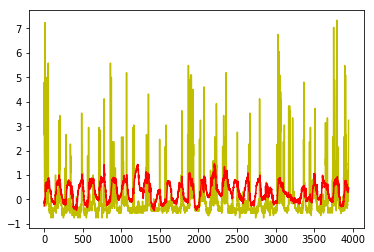

In [333]:
# Actual (yellow) vs Test (red)
plt.plot(T_test, '-y')
plt.plot(Y, '-r')

### Result Conclusion

Based on the information gathered above I found that LS seems to preform slightly better on my data. It seems the LS had around an error value of 53 while LMS had an error value of 58. Well, what does this mean? Over all it's hard to tell visually. There are two major differences, visually, between the LS and LMS plots. The first major difference occurs around sample 2000. The LS prediction at sample 2000 has a large negative spike while LMS has a more well-rounded curve. The second difference is the clustering predictions. If you look at LS you can see it frequently predicts values around 0 while LMS seems to make less frequent predictions around 0 (it seems almost offset in the positive direction slightly). I believe this issues might account for the error difference.

In the end, it is hard to tell visually which method is better. Therefore, I'll stick with my error measurement and claim that LS is slightly better due to its lesser error value.

# Conclusions


The greatest difficulty I faced was deciphering the way you wanted us to program the LMS train_step function. I found it strange that you called the train_step function by itself. In doing so, the bias and the weights had to be initialized inside the train_step function instead of inside the train function. It took me short bit to figure this out, but once I stopped adding my bias and initializing my weights in the train function everything worked out. </br>

Over all I enjoyed the assignment, but I would have liked some more information regarding the extra credit. If you could add links to sources you feel are good reference points for understanding weights and residuals it would be much appreciated!

# References

Luis M. Candanedo, Veronique Feldheim, Dominique Deramaix, Data driven prediction models of energy use of appliances in a low-energy house, Energy and Buildings, Volume 140, 1 April 2017, Pages 81-97, ISSN 0378-7788, [Web Link](https://www.sciencedirect.com/science/article/pii/S0378778816308970?via%3Dihub).

# Extra Credit


## Feature Analysis

As seen above, the random variable features don't seem to affect my data at all. What about other features? Let's take a look to see if there are any more unneeded features!I will be using LS since it provided the lowest error value for this analysis.

### Features 1-13

First, let's look at what features I think might be the best! Below are 13 features I thought might have the most impact.

- lights, energy use of light fixtures in the house in Wh 
- T1, Temperature in kitchen area, in Celsius 
- RH_1, Humidity in kitchen area, in % 
- T2, Temperature in living room area, in Celsius 
- RH_2, Humidity in living room area, in % 
- T3, Temperature in laundry room area 
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius 
- RH_4, Humidity in office room, in % 
- T5, Temperature in bathroom, in Celsius 
- RH_5, Humidity in bathroom, in % 
- T6, Temperature outside the building (north side), in Celsius

In [334]:
# Capture raw data
T_raw = df_reg.iloc[:, 0].values
X_raw = df_reg.iloc[:, 1:10].values
for i in range(X_raw.shape[1]): # norm data column wise
       X_raw[:, i] = (X_raw[:, i] - np.mean(X_raw[:, i])) / np.std(X_raw[:, i])
T_raw = (T_raw - np.mean(T_raw)) / np.std(T_raw) # norm data

# Set partition size (80%)
partition = math.floor(len(X_raw) * .8)

# Train data split
X_train = X_raw[:partition, :]
T_train = T_raw[:partition].reshape(-1,1)
print("Train Shape Check:", X_train.shape, T_train.shape)

# Test data split
X_test = X_raw[partition:, :]
T_test = T_raw[partition:].reshape(-1,1)
print("Test Shape Check:", X_test.shape, T_test.shape)

# Init class
ls = LinearRegress()
# Train data
train_err, _= ls.train(X_train, T_train)
# Test data
Y = ls.use(X_test)
test_err = np.sqrt(np.sum((Y-T_test)**2))
res_ls = Y-T_test

Train Shape Check: (15788, 9) (15788, 1)
Test Shape Check: (3947, 9) (3947, 1)


C:\Users\Loyal\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [335]:
train_err

119.5121216841973

In [336]:
test_err

56.014161496922924

As we can see our test error is slightly higher than using all features.

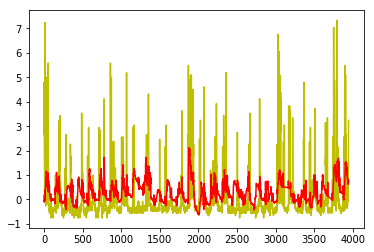

In [337]:
# Actual (yellow) vs Test (red)
plt.plot(T_test, '-y')
plt.plot(Y, '-r')

### Hand picking

Clealy, guessing which features might be best didn't prove much. Now, let's try to pick the best features by only adding features that reduce the error. We will slowly add every feature, one at a time, and only add features to our feature list when they reduce the error. This means if the previous error is lower than the current error our feature may not be that usefull. If our previous error is higher than our current error then the added feature might be useful. A very basic idea, but let's see what happens. Below is the code to put this thought into action!

In [338]:
prev_err = 99999 # init error to a large number
features = [] # feature list
n = df_reg.shape[1]
for i in range(2, n):# loop through all the features
    # Capture raw data
    T_raw = df_reg.iloc[:, 0].values
    X_raw = df_reg.iloc[:, 1:i].values
    for f in range(X_raw.shape[1]): # norm data column wise
           X_raw[:, f] = (X_raw[:, f] - np.mean(X_raw[:, f])) / np.std(X_raw[:, f])
    T_raw = (T_raw - np.mean(T_raw)) / np.std(T_raw) # norm data

    # Set partition size (80%)
    partition = math.floor(len(X_raw) * .8)

    # Train data split
    X_train = X_raw[:partition, :]
    T_train = T_raw[:partition].reshape(-1,1)
    #print("Train Shape Check:", X_train.shape, T_train.shape)

    # Test data split
    X_test = X_raw[partition:, :]
    T_test = T_raw[partition:].reshape(-1,1)
    #print("Test Shape Check:", X_test.shape, T_test.shape)

    # Init class
    ls = LinearRegress()
    # Train data
    train_err, _= ls.train(X_train, T_train)
    # Test data
    Y = ls.use(X_test)
    test_err = np.sqrt(np.sum((Y-T_test)**2))
    res_ls = Y-T_test
    print("Prev vs Current ", prev_err, test_err)
    if prev_err > test_err: # compare prev vs current
        features.append(i) # append feature index
    prev_err = test_err
        

Prev vs Current  99999 55.88336325913871
Prev vs Current  55.88336325913871 56.17448830309392
Prev vs Current  56.17448830309392 56.348892482280256
Prev vs Current  56.348892482280256 56.62462400095922
Prev vs Current  56.62462400095922 54.22220185171732
Prev vs Current  54.22220185171732 57.00274939473187
Prev vs Current  57.00274939473187 57.01960260259685
Prev vs Current  57.01960260259685 55.88841522111089
Prev vs Current  55.88841522111089 56.014161496922924
Prev vs Current  56.014161496922924 55.76456013093332
Prev vs Current  55.76456013093332 55.75949432678686


C:\Users\Loyal\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Prev vs Current  55.75949432678686 55.946948523160984
Prev vs Current  55.946948523160984 56.27119302423164
Prev vs Current  56.27119302423164 56.77374280692996
Prev vs Current  56.77374280692996 55.25390043505595
Prev vs Current  55.25390043505595 55.11154047533493
Prev vs Current  55.11154047533493 54.28081900017109
Prev vs Current  54.28081900017109 53.71926344761715
Prev vs Current  53.71926344761715 53.74211349926225
Prev vs Current  53.74211349926225 53.48611569006357
Prev vs Current  53.48611569006357 53.54925065400086
Prev vs Current  53.54925065400086 53.578240494002436
Prev vs Current  53.578240494002436 53.260877326119946
Prev vs Current  53.260877326119946 53.3031512944007


Below are the features the algorithm extracted. Now let's put them to the test!

In [339]:
print("Length:", len(features), "\nFeatures Selected:", features)

Length: 11 
Features Selected: [2, 6, 9, 11, 12, 16, 17, 18, 19, 21, 24]


In [340]:
T_raw = df_reg.iloc[:, 0].values
X_raw = df_reg.iloc[:, features].values
for i in range(X_raw.shape[1]): # norm data column wise
       X_raw[:, i] = (X_raw[:, i] - np.mean(X_raw[:, i])) / np.std(X_raw[:, i])
T_raw = (T_raw - np.mean(T_raw)) / np.std(T_raw) # norm data

# Set partition size (80%)
partition = math.floor(len(X_raw) * .8)

# Train data split
X_train = X_raw[:partition, :]
T_train = T_raw[:partition].reshape(-1,1)
print("Train Shape Check:", X_train.shape, T_train.shape)

# Test data split
X_test = X_raw[partition:, :]
T_test = T_raw[partition:].reshape(-1,1)
print("Test Shape Check:", X_test.shape, T_test.shape)

# Init class
ls = LinearRegress()
# Train data
train_err, _= ls.train(X_train, T_train)
# Test data
Y = ls.use(X_test)
test_err = np.sqrt(np.sum((Y-T_test)**2))
res_ls = Y-T_test

Train Shape Check: (15788, 11) (15788, 1)
Test Shape Check: (3947, 11) (3947, 1)


C:\Users\Loyal\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [341]:
train_err

122.22861339883902

In [342]:
test_err

55.21548138596264

As one could expect with such a simplistic idea, leaving many gaps in the combination of features, we only preformed slightly better than my selection of features 1-13. We still preformed worse than when all our features are provided. For this dataset I believe more complex feature reduction or feature extraction techniques are required to find some interesting results.

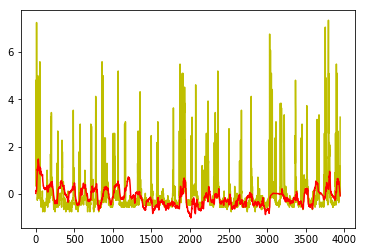

In [343]:
# Actual (yellow) vs Test (red)
plt.plot(T_test, '-y')
plt.plot(Y, '-r')

## Weights and Residuals

## Weights

Here we can see the weights for LS and LMS. From what I've read it’s hard to tell if the value of the weight determines the importance or worth of said weight. From these visuals we can tell that most weights have some sort of value to them with only a few being close to 0.

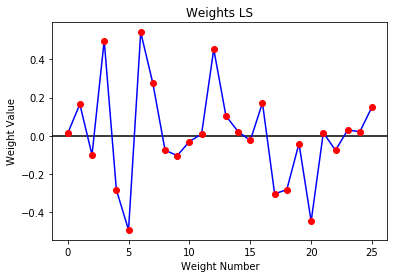

In [344]:
plt.axhline(0, color='black')
plt.plot(w_ls, 'b-')
plt.plot(w_ls, 'ro')
plt.title("Weights LS")
plt.xlabel("Weight Number")
plt.ylabel("Weight Value");

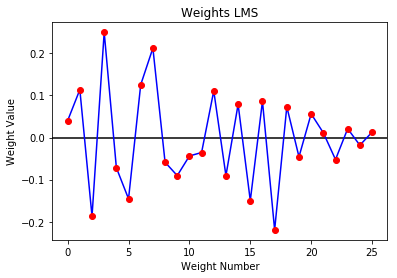

In [345]:
plt.axhline(0, color='black')
plt.plot(w_lms, 'b-')
plt.plot(w_lms, 'ro')
plt.title("Weights LMS")
plt.xlabel("Weight Number")
plt.ylabel("Weight Value");

## Residuals

As we can see most of the residuals seem to be centered around 0 for both LS and LMS with a fair bit of the residuals being located below 0. We also have a few residuals located above 0. Overall, it is hard to see if there is a pattern other than the fact that the residuals are centered around 0. Both models seem to have relatively random residuals, this might indicate a linear regression model is appropriate.

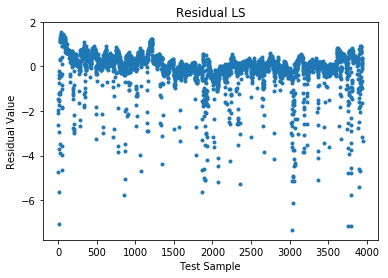

In [346]:
plt.plot(res_ls, '.')
plt.title("Residual LS")
plt.xlabel("Test Sample")
plt.ylabel("Residual Value");

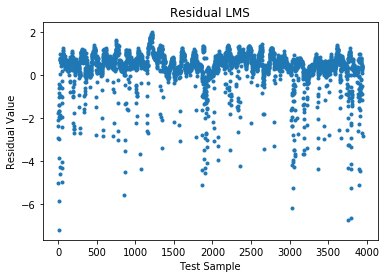

In [347]:
plt.plot(res_lms, '.')
plt.title("Residual LMS")
plt.xlabel("Test Sample")
plt.ylabel("Residual Value");

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 

# Preliminary Test

In [53]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
[[1 2 5]]
[[1 6 2]]
[[1 1 9]]
[[1 4 5]]
[[1 6 3]]
[[1 7 4]]
[[1 8 3]]
training  LMS_1STEP ...
[[1 2 5]]
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


C:\Users\Loyal\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
